In [1]:
! pip install requests==2.25.1
! pip install beautifulsoup4==4.9.3

In [2]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

## Get data

In [3]:
data = rq.get("https://www.worldometers.info/coronavirus")
# data.content


## Parse data

In [4]:
data_parsed = BeautifulSoup(data.content)

In [5]:
table = data_parsed.find('table', attrs = {'id':'main_table_countries_today'})

In [6]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New 

In [7]:
rows = table.find_all('tr')

In [8]:
rows[0]

<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

In [9]:
rows[0].text.strip()

'#\nCountry,Other\nTotalCases\nNewCases\nTotalDeaths\nNewDeaths\nTotalRecovered\nNewRecovered\nActiveCases\nSerious,Critical\nTot\xa0Cases/1M pop\nDeaths/1M pop\nTotalTests\nTests/\n1M pop\n\nPopulation\nContinent\n1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl\nNew Cases/1M pop\nNew Deaths/1M pop\nActive Cases/1M pop'

In [10]:
#tokenization
rows[9].text.strip().split('\n')

['1',
 'USA',
 '84,066,379',
 '',
 '1,026,109 ',
 '',
 '81,163,689',
 '',
 '1,876,581',
 '1,902',
 '251,239',
 '3,067',
 '1,015,265,120',
 '3,034,201',
 '334,607,037 ',
 'North America',
 '43260',
 '',
 '',
 '5,608']

## Store data

In [11]:
stored_data = []

for x in rows:
    stored_data.append(x.text.strip().split('\n')[1:9])

In [12]:
stored_data

[['Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases'],
 ['', '99,466,474', '', '1,466,594', '', '94,733,439', '', '3,266,441'],
 ['',
  '149,679,791',
  '+148,035',
  '1,427,484',
  '+190',
  '126,984,984',
  '+36,196',
  '21,267,323'],
 ['',
  '57,076,865',
  '+174',
  '1,296,215',
  '',
  '53,170,992',
  '+193',
  '2,609,658'],
 ['',
  '193,781,175',
  '+521',
  '1,828,909',
  '',
  '181,206,940',
  '+93,886',
  '10,745,326'],
 ['',
  '7,836,419',
  '+59,301',
  '11,307',
  '+80',
  '7,305,575',
  '+7,404',
  '519,537'],
 ['', '12,024,127', '', '254,192', '', '11,197,387', '', '572,548'],
 ['', '15', '', '706', '', '0', '0'],
 ['519,865,572',
  '+208,031',
  '6,284,716',
  '+270',
  '474,600,023',
  '+137,679',
  '38,980,833',
  '39,189'],
 ['USA', '84,066,379', '', '1,026,109 ', '', '81,163,689', '', '1,876,581'],
 ['India', '43,116,600', '', '524,190 ', '', '42,573,460', '', '18,950'],
 ['Brazil', '30

In [13]:
df = pd.DataFrame(stored_data)

In [14]:
df.head()

,0,1,2,3,4,5,6,7
0,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
1,,"99,466,474",,"1,466,594",,"94,733,439",,"3,266,441"
2,,"149,679,791","+148,035","1,427,484",+190,"126,984,984","+36,196","21,267,323"
3,,"57,076,865",+174,"1,296,215",,"53,170,992",+193,"2,609,658"
4,,"193,781,175",+521,"1,828,909",,"181,206,940","+93,886","10,745,326"


In [15]:
import time

time_now = time.time()

local_time = time.localtime(time_now)

formatted_time = time.asctime(local_time)
formatted_time

'Fri May 13 10:13:10 2022'

In [16]:
df.to_csv(f"{formatted_time}.csv")

In [17]:
import os
os.listdir()

['Fri May 13 09:53:45 2022.csv',
 '.ipynb_checkpoints',
 'final_project.ipynb',
 'numpy_basics.ipynb',
 'plotting.ipynb',
 'Fri May 13 10:13:10 2022.csv',
 'Fri May 13 09:56:31 2022.csv',
 '.jovianrc',
 'named.ipynb']

In [18]:
df = pd.DataFrame(stored_data[9:], columns = stored_data[0])
df


,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,USA,"84,066,379",,"1,026,109",,"81,163,689",,"1,876,581"
1,India,"43,116,600",,"524,190",,"42,573,460",,"18,950"
2,Brazil,"30,639,130",,"664,700",,"29,703,904",,"270,526"
3,France,"29,097,570",,"147,159",,"28,017,247",,"933,164"
4,Germany,"25,665,910",,"137,628",,"23,875,700","+71,100","1,652,582"
...,...,...,...,...,...,...,...,...
231,"193,781,175",+521,"1,828,909",,"181,206,940",,"10,745,326","8,084"
232,"7,836,419","+59,301","11,307",+80,"7,305,575","+7,404","519,537",156
233,"12,024,127",,"254,192",,"11,197,387",,"572,548",965
234,721,,15,,706,,0,0


In [19]:
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,USA,"84,066,379",,"1,026,109",,"81,163,689",,"1,876,581"
1,India,"43,116,600",,"524,190",,"42,573,460",,"18,950"
2,Brazil,"30,639,130",,"664,700",,"29,703,904",,"270,526"
3,France,"29,097,570",,"147,159",,"28,017,247",,"933,164"
4,Germany,"25,665,910",,"137,628",,"23,875,700","+71,100","1,652,582"


In [20]:
df.to_csv(f"{formatted_time}.csv")

### visualize

In [21]:
# Get the required columns
df_plot = df[['Country,Other', 'TotalCases']]

# Get the first ten rows
df_plot = df_plot[:10]

In [22]:
# chaeck the dataframe
df_plot.head()

,"Country,Other",TotalCases
0,USA,"84,066,379"
1,India,"43,116,600"
2,Brazil,"30,639,130"
3,France,"29,097,570"
4,Germany,"25,665,910"


In [23]:
df_plot.TotalCases = df_plot['TotalCases'].apply(lambda x: x.replace(',', '')).astype(int)

In [24]:
df_plot.head()

,"Country,Other",TotalCases
0,USA,84066379
1,India,43116600
2,Brazil,30639130
3,France,29097570
4,Germany,25665910


<AxesSubplot:xlabel='Country,Other'>

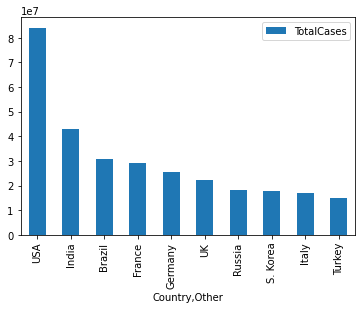

In [25]:
df_plot.plot(kind='bar', x = 'Country,Other', y = 'TotalCases')

In [26]:
import jovian
jovian.commit("This is my first data analysis project")

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/juliusnjeru/final-project


'https://jovian.ai/juliusnjeru/final-project'